## Importing The Libraries

In [1]:
#Importing libraries

#Basic libraries
import pandas as pd
import numpy as np
import os
# handling warnings
import warnings
warnings.filterwarnings('ignore')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data modelling libraries 
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.feature_selection import RFE
import  statsmodels.api as sm
#Statistics
from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_column',None)

# Understanding the data

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Preparation
- Handle the missing values

In [5]:
data.isnull().sum()       # drop the variables which is above 600

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### The columns which contains high number of values can be dropped beacuse it does not effect to the model building part
- The columns which are likely to be dropped are - PoolQC','MiscFeature','Alley','Fence','FireplaceQu

In [6]:
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

- After dropping the columns the shape of the data is 1460 rows and 76 columns

In [7]:
data.shape

(1460, 76)

In [8]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
data['GarageQual'].value_counts() # So the most of the value is TA so we have to replace the null value to TA

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [10]:
data["GarageQual"] = data["GarageQual"].replace(np.nan,"TA")

In [11]:
data["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [12]:
# As all the values are almost evenly distributed it would be not right to replace null with mode.So creating a new category names unknown
data['GarageFinish']=data['GarageFinish'].replace(np.nan,'Unknown')

In [13]:
data["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [14]:
data["GarageType"] = data["GarageType"].replace(np.nan,"Attchd")

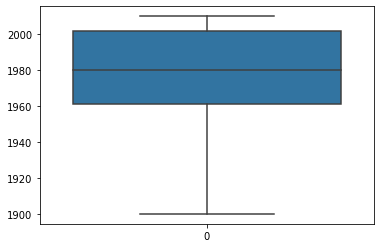

In [15]:
sns.boxplot(data["GarageYrBlt"])      #Their is no outliers
plt.show()

In [16]:
data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean(),inplace=True)

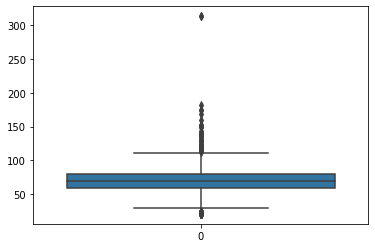

In [17]:
sns.boxplot(data["LotFrontage"])  # As their is an outliers so we use median to fill the values
plt.show()

In [18]:
data["LotFrontage"].fillna(data["LotFrontage"].median(),inplace=True) #As their is an outliers so we use median to fill the values

<AxesSubplot:>

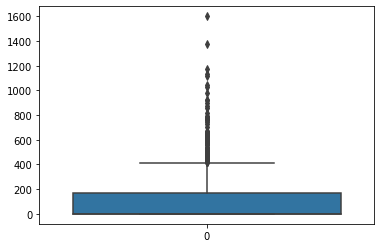

In [19]:
sns.boxplot(data["MasVnrArea"])

In [20]:
data["MasVnrArea"].fillna(data["MasVnrArea"].median(),inplace=True) #As their is an outliers so we use median to fill the values

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

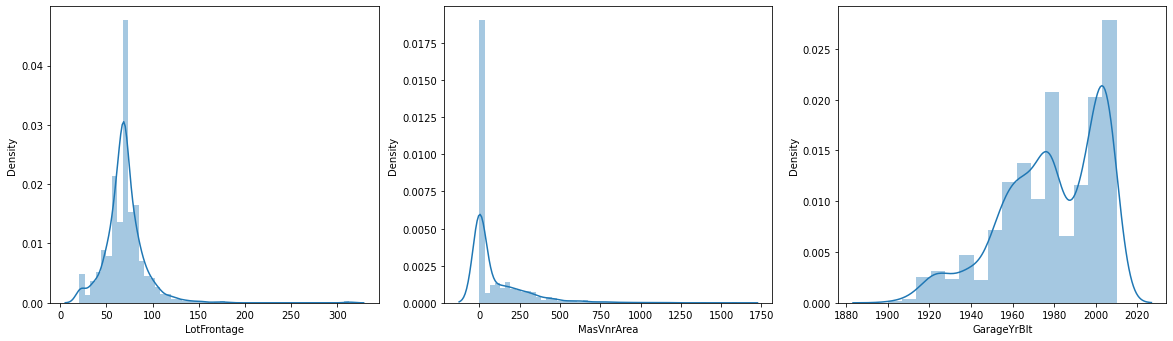

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(data['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(data['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(data['GarageYrBlt'])

In [22]:
data.shape  # we drop the rows which is not required or which is not effect the model well

(1460, 76)

In [23]:
data['GarageType'] = data['GarageType'].replace(np.nan, 'No Garage')
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'No Garage')
data['GarageCond'] = data['GarageCond'].replace(np.nan, 'No Garage')
data['GarageQual'] = data['GarageQual'].replace(np.nan, 'No Garage')
data['MasVnrType'] = data['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
data['Electrical'] = data['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field

In [24]:
data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [25]:
data.shape

(1460, 76)

In [26]:
data.dropna(inplace=True) # Remove the all unwanted rows or the null rows 

In [27]:
data.shape

(1421, 76)

## ALL MISSSING VALUE IS HANDLE !!!

## DATA MANIPULATION and DATA VISUALIZATION
- ALL MISSSING VALUE IS HANDLE !!!

In [28]:
data.columns  # So the data have these columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

#### So first of all we have to reduce the skewness of the target variable so that it will perform well in the train and testing data

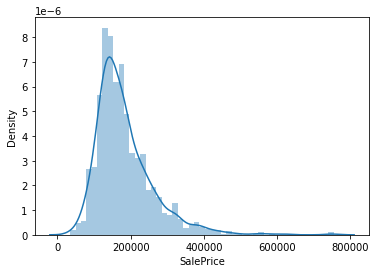

In [29]:
sns.distplot(data["SalePrice"])
plt.show()

- So to remove the skewness of the data we used the data transformation and help in reduce the skewness of the SalePrice with help of log function

In [30]:
data['SalePrice']=np.log(data.SalePrice) 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

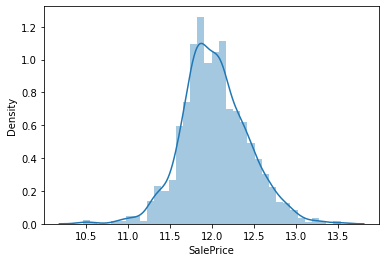

In [31]:
sns.distplot(data["SalePrice"])

##### There are four columns which gives us details about the years of the construction. Deriving a new column time_of_sold of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built

In [32]:
data[['YrSold', 'MoSold','YearBuilt','YearRemodAdd']].head()

,YrSold,MoSold,YearBuilt,YearRemodAdd
0,2008,2,2003,2003
1,2007,5,1976,1976
2,2008,9,2001,2002
3,2006,2,1915,1970
4,2008,12,2000,2000


- These are the columns which is made of four columns which give the same information . So I combined and make the one columns . This help to analyise the data easliy

In [33]:
data['time_of_sold'] = data["YrSold"]-data["YearRemodAdd"]
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,time_of_sold
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216,8


In [34]:
data["time_of_sold"].head()

0     5
1    31
2     6
3    36
4     8
Name: time_of_sold, dtype: int64

##### Remove the rest of columns which give the year or month a information

In [35]:
data.shape

(1421, 77)

In [36]:
data=data.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [37]:
data.shape # Now columns is dropped

(1421, 73)

In [38]:
# Now see the full data 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,time_of_sold
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,12.317167,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,11.849398,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,12.429216,8


In [39]:
# remove the unwanted columns
# Dropping the id as it does not effect the data
data = data.drop(["Id"],axis=1)

- Check the object type and numeric type columns

In [40]:
numeric_feats = data.dtypes[data.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'time_of_sold'],
      dtype='object')

In [41]:
object_feats = data.dtypes[data.dtypes == "object"].index
object_feats

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

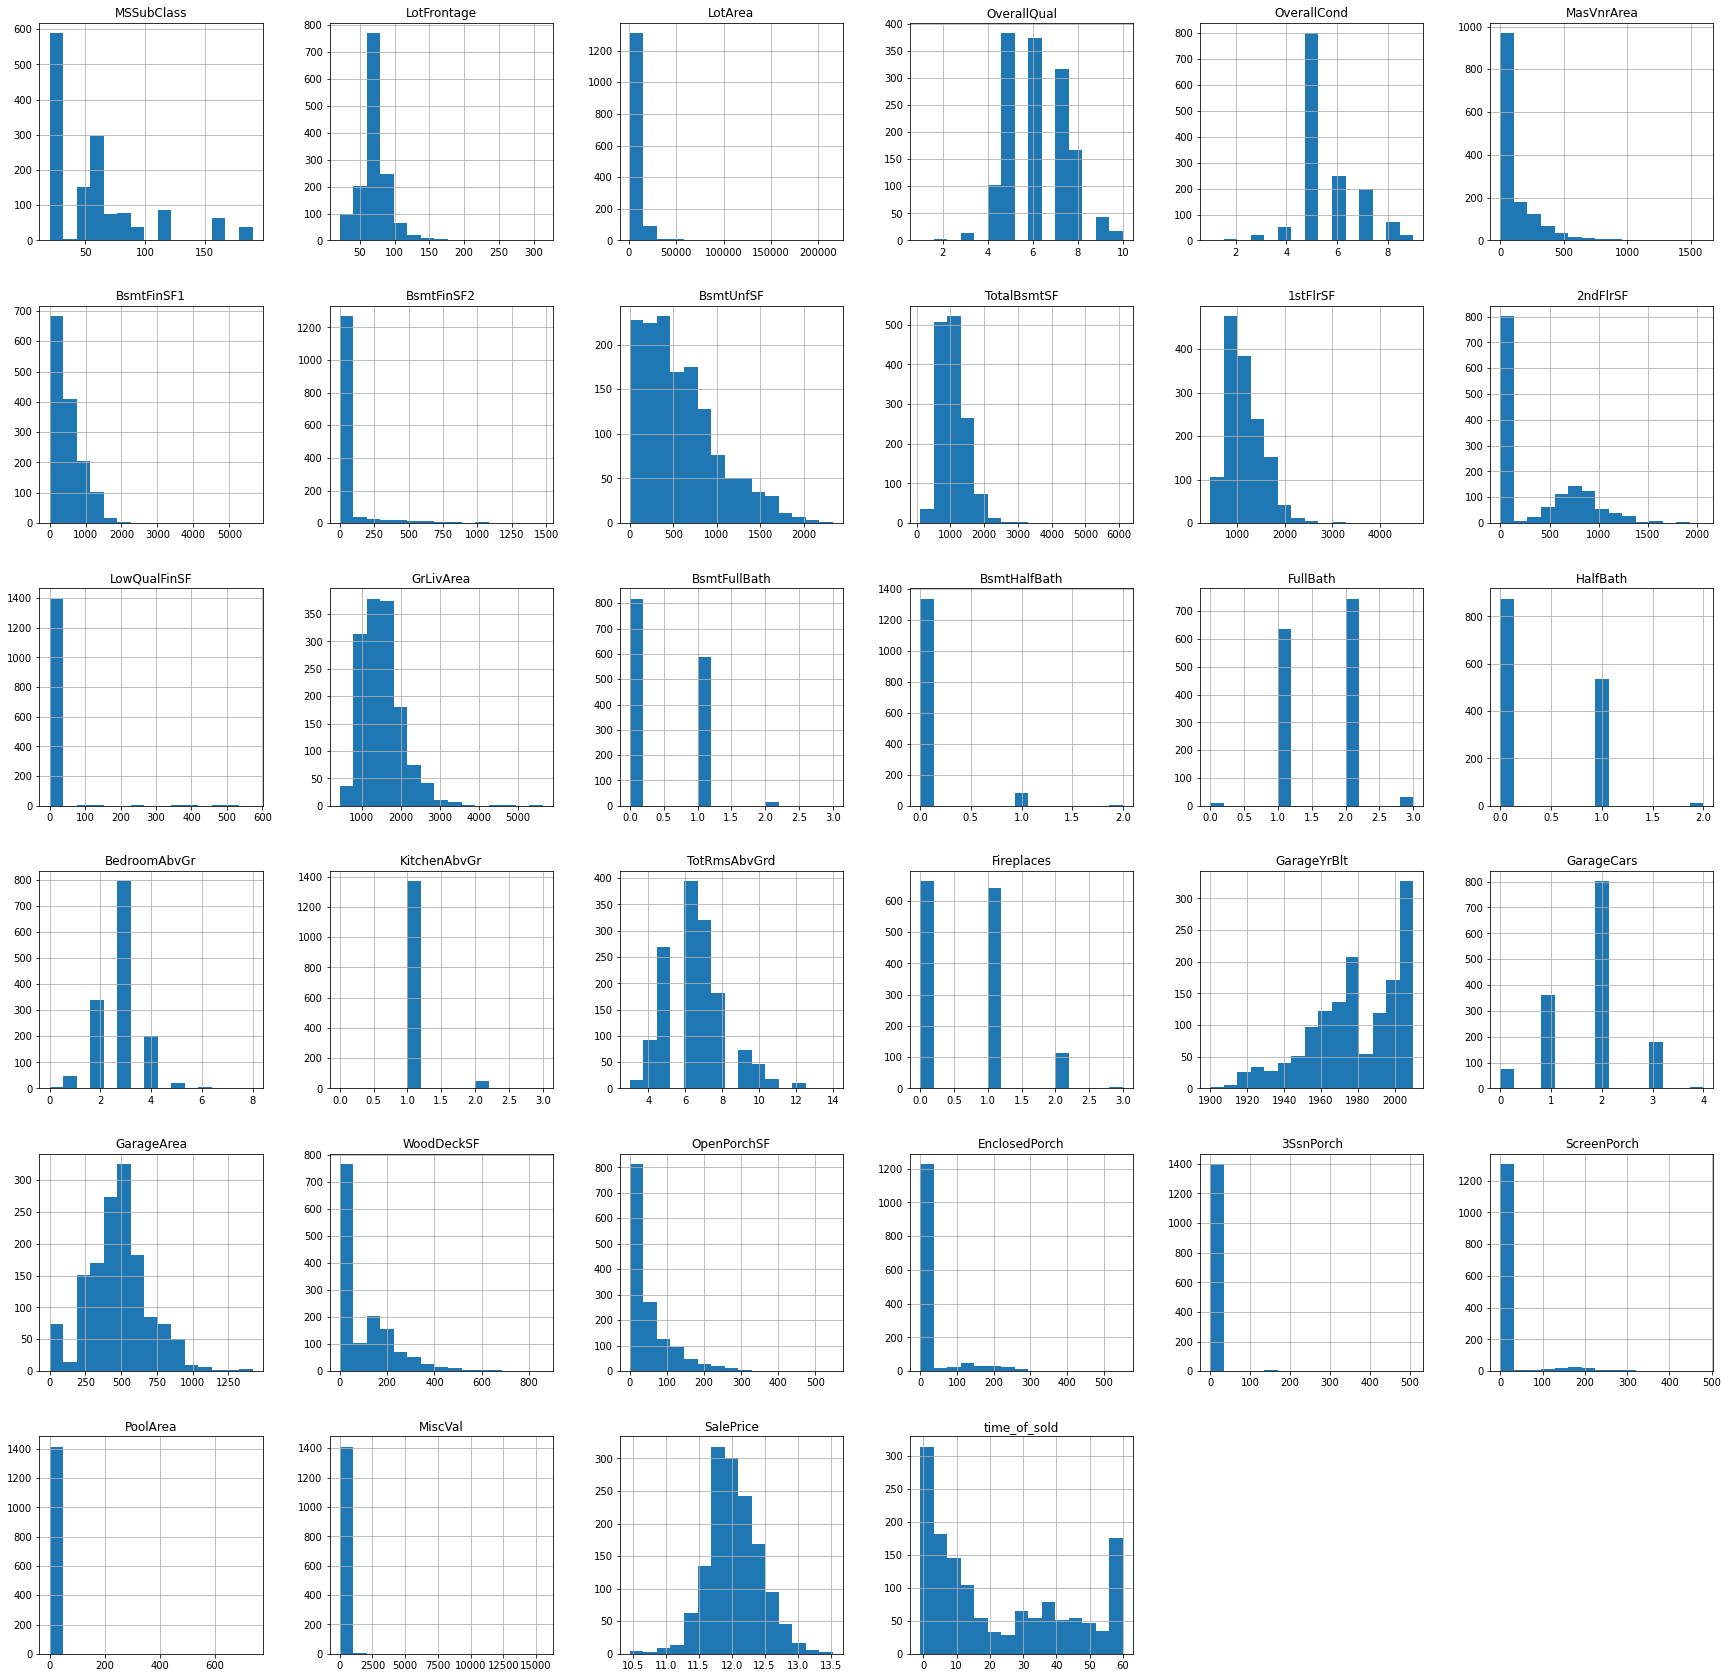

In [42]:
data[numeric_feats].hist(bins=15, figsize=(30, 30))
plt.show()

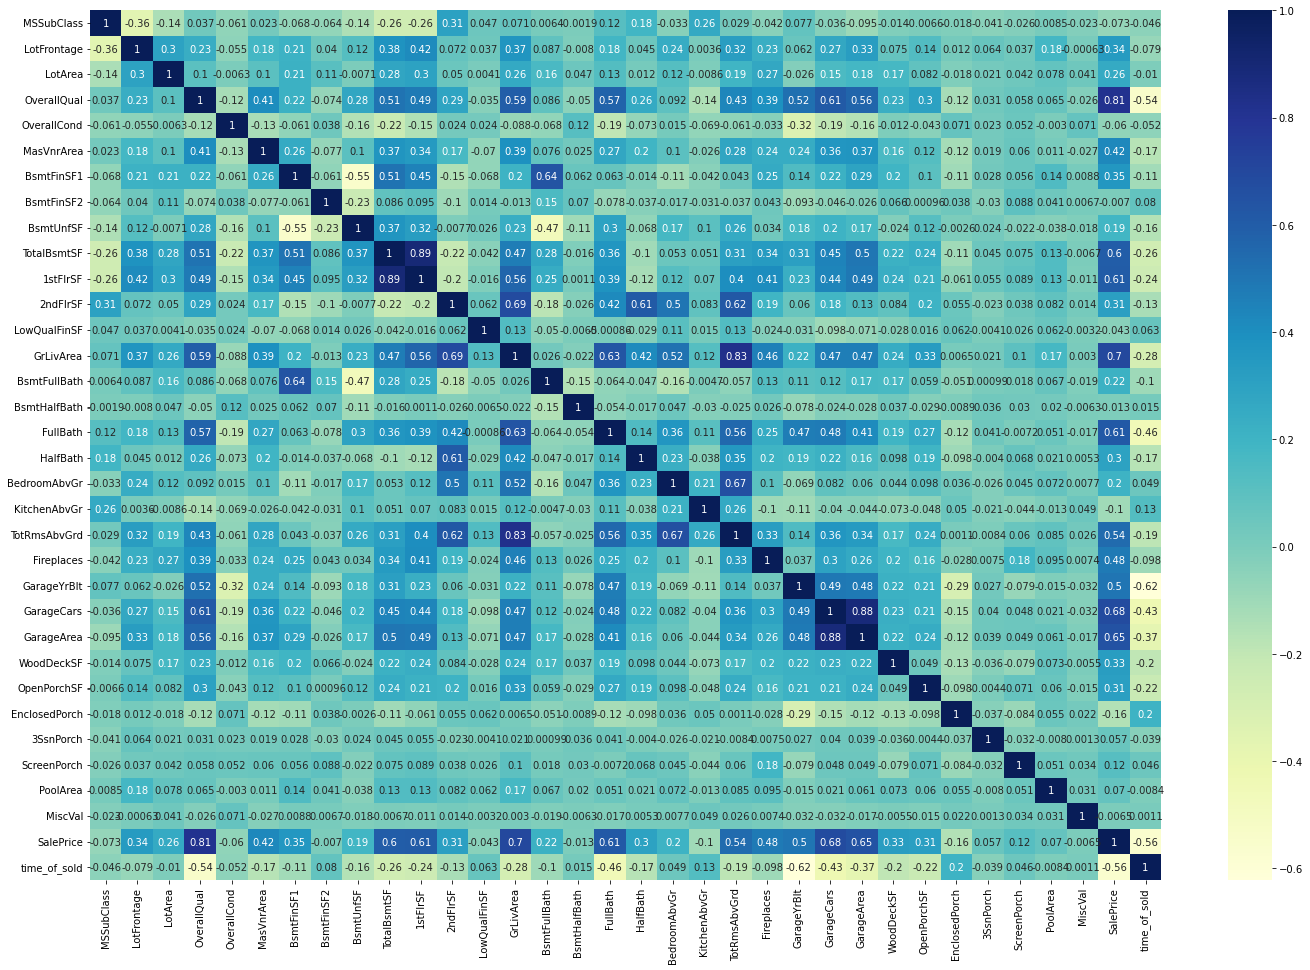

In [43]:
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Inferences: Based on the correlation we can make few following interpretions
- SalePrice is very high positively correlated to the Overall Quality(0.79)

- SalePrice is very high positively correlated to the 1stFlrSF (0.61)
- SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
- SalePrice is very high positively correlated to the GrLivArea (0.71)
- SalePrice is very high positively correlated to the FullBath(0.58)
- SalePrice is very high positively correlated to the TotRmsAbvGrd(0.55)
- SalePrice is very high positively correlated to the GarageCars(0.64)
- SalePrice is very high positively correlated to the GarageAre(0.62)
- SalePrice is very high negatively correlated to the time_of_sold(-0.5)

# Exploratory Data Analysis

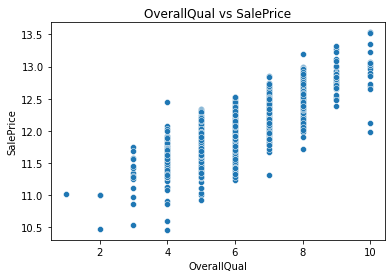

In [44]:
# Now check with the scatter plot

sns.scatterplot(x="OverallQual",y="SalePrice",data = data)
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

- It seems that the their is increasing trend when the Overall Quality increases the SalePrice is increasing

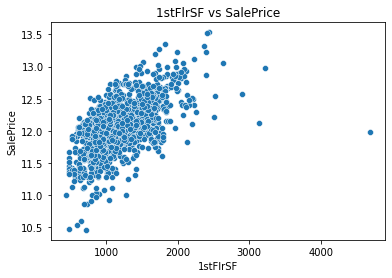

In [45]:
sns.scatterplot(x=data["1stFlrSF"],y="SalePrice",data = data)
plt.title('1stFlrSF vs SalePrice')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

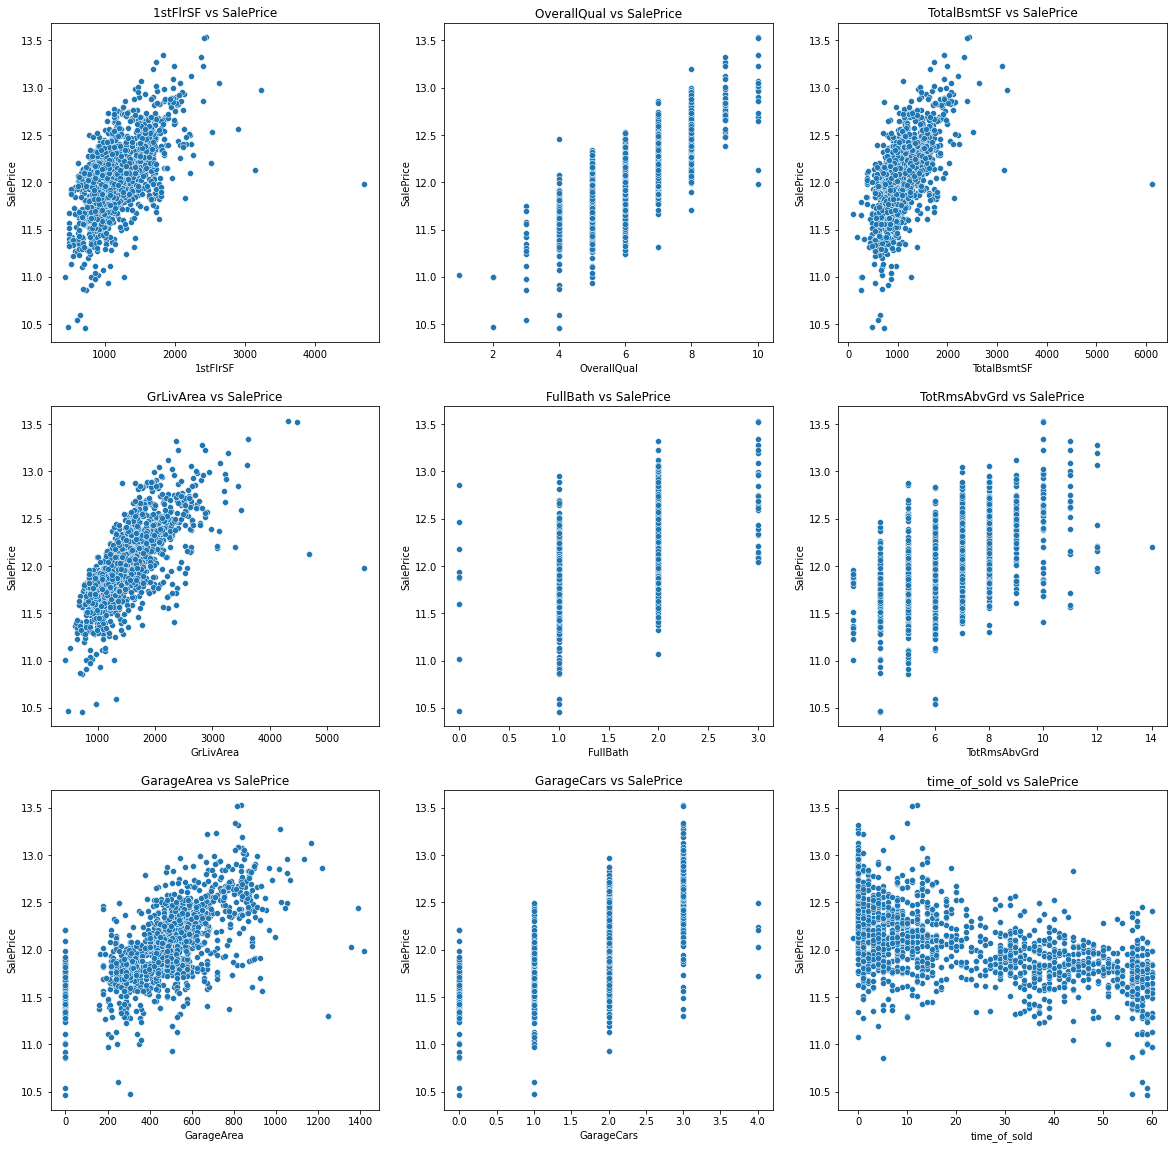

In [46]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.scatterplot(x=data["1stFlrSF"],y="SalePrice",data = data)
plt.title('1stFlrSF vs SalePrice')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

plt.subplot(3,3,2)
sns.scatterplot(x="OverallQual",y="SalePrice",data = data)
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

plt.subplot(3,3,3)
sns.scatterplot(x= data["TotalBsmtSF"],y=data["SalePrice"],data=data)
plt.title('TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.subplot(3,3,4)
sns.scatterplot(x= data["GrLivArea"],y=data["SalePrice"],data=data)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(3,3,5)
sns.scatterplot(x= data["FullBath"],y=data["SalePrice"],data=data)
plt.title('FullBath vs SalePrice')
plt.xlabel('FullBath')
plt.ylabel('SalePrice')

plt.subplot(3,3,6)
sns.scatterplot(x= data["TotRmsAbvGrd"],y=data["SalePrice"],data=data)
plt.title('TotRmsAbvGrd vs SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')

plt.subplot(3,3,7)
sns.scatterplot(x= data["GarageArea"],y=data["SalePrice"],data=data)
plt.title('GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')


plt.subplot(3,3,8)
sns.scatterplot(x= data["GarageCars"],y=data["SalePrice"],data=data)
plt.title('GarageCars vs SalePrice')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')


plt.subplot(3,3,9)
sns.scatterplot(x= data["time_of_sold"],y=data["SalePrice"],data=data)
plt.title('time_of_sold vs SalePrice')
plt.xlabel('time_of_sold')
plt.ylabel('SalePrice')

plt.show()


### Inferences :

- We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
- We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to their characteritics

### Now I check the Catigorical variables
-  Now we have to analyise the catigorical variable in the form of boxplot, which help me which features is good for the increase in Sales
- Take the subplot of 3X3 matircs and which help to anlayise the feature faster
- After the visualization , We can got to know that which feature is better or which feature have high skewness
- The higher the skewness help out that the particular varibale is not effect to much to the model . So we drop it.

In [47]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,time_of_sold
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,12.247694,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,12.109011,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,12.317167,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,11.849398,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,12.429216,8


<!-- -'MSZoning', 
 -'Street', 
 -'LotShape',
-'LandContour', 
'Utilities',
'LotConfig', 
'LandSlope', 
'Neighborhood', 
'Condition1',  -->

<!-- 'Condition2',
'BldgType',
'HouseStyle', 
'RoofStyle', 
'RoofMatl', 
'Exterior1st',
'Exterior2nd', 
'MasVnrType', 
'ExterQual',  -->

<!-- 'ExterCond', 
'Foundation',
 'BsmtQual', 
 'BsmtCond', 
 'BsmtExposure', 
 'BsmtFinType1', 
 'BsmtFinType2',
'Heating', 
'HeatingQC',  -->

<!-- 'CentralAir', 
'Electrical',
'KitchenQual',
 'Functional', 
 'GarageType', 
 'GarageFinish', 
 'GarageQual', 
 'GarageCond',
'PavedDrive',  -->

<!-- 'SaleType', 
'SaleCondition' -->


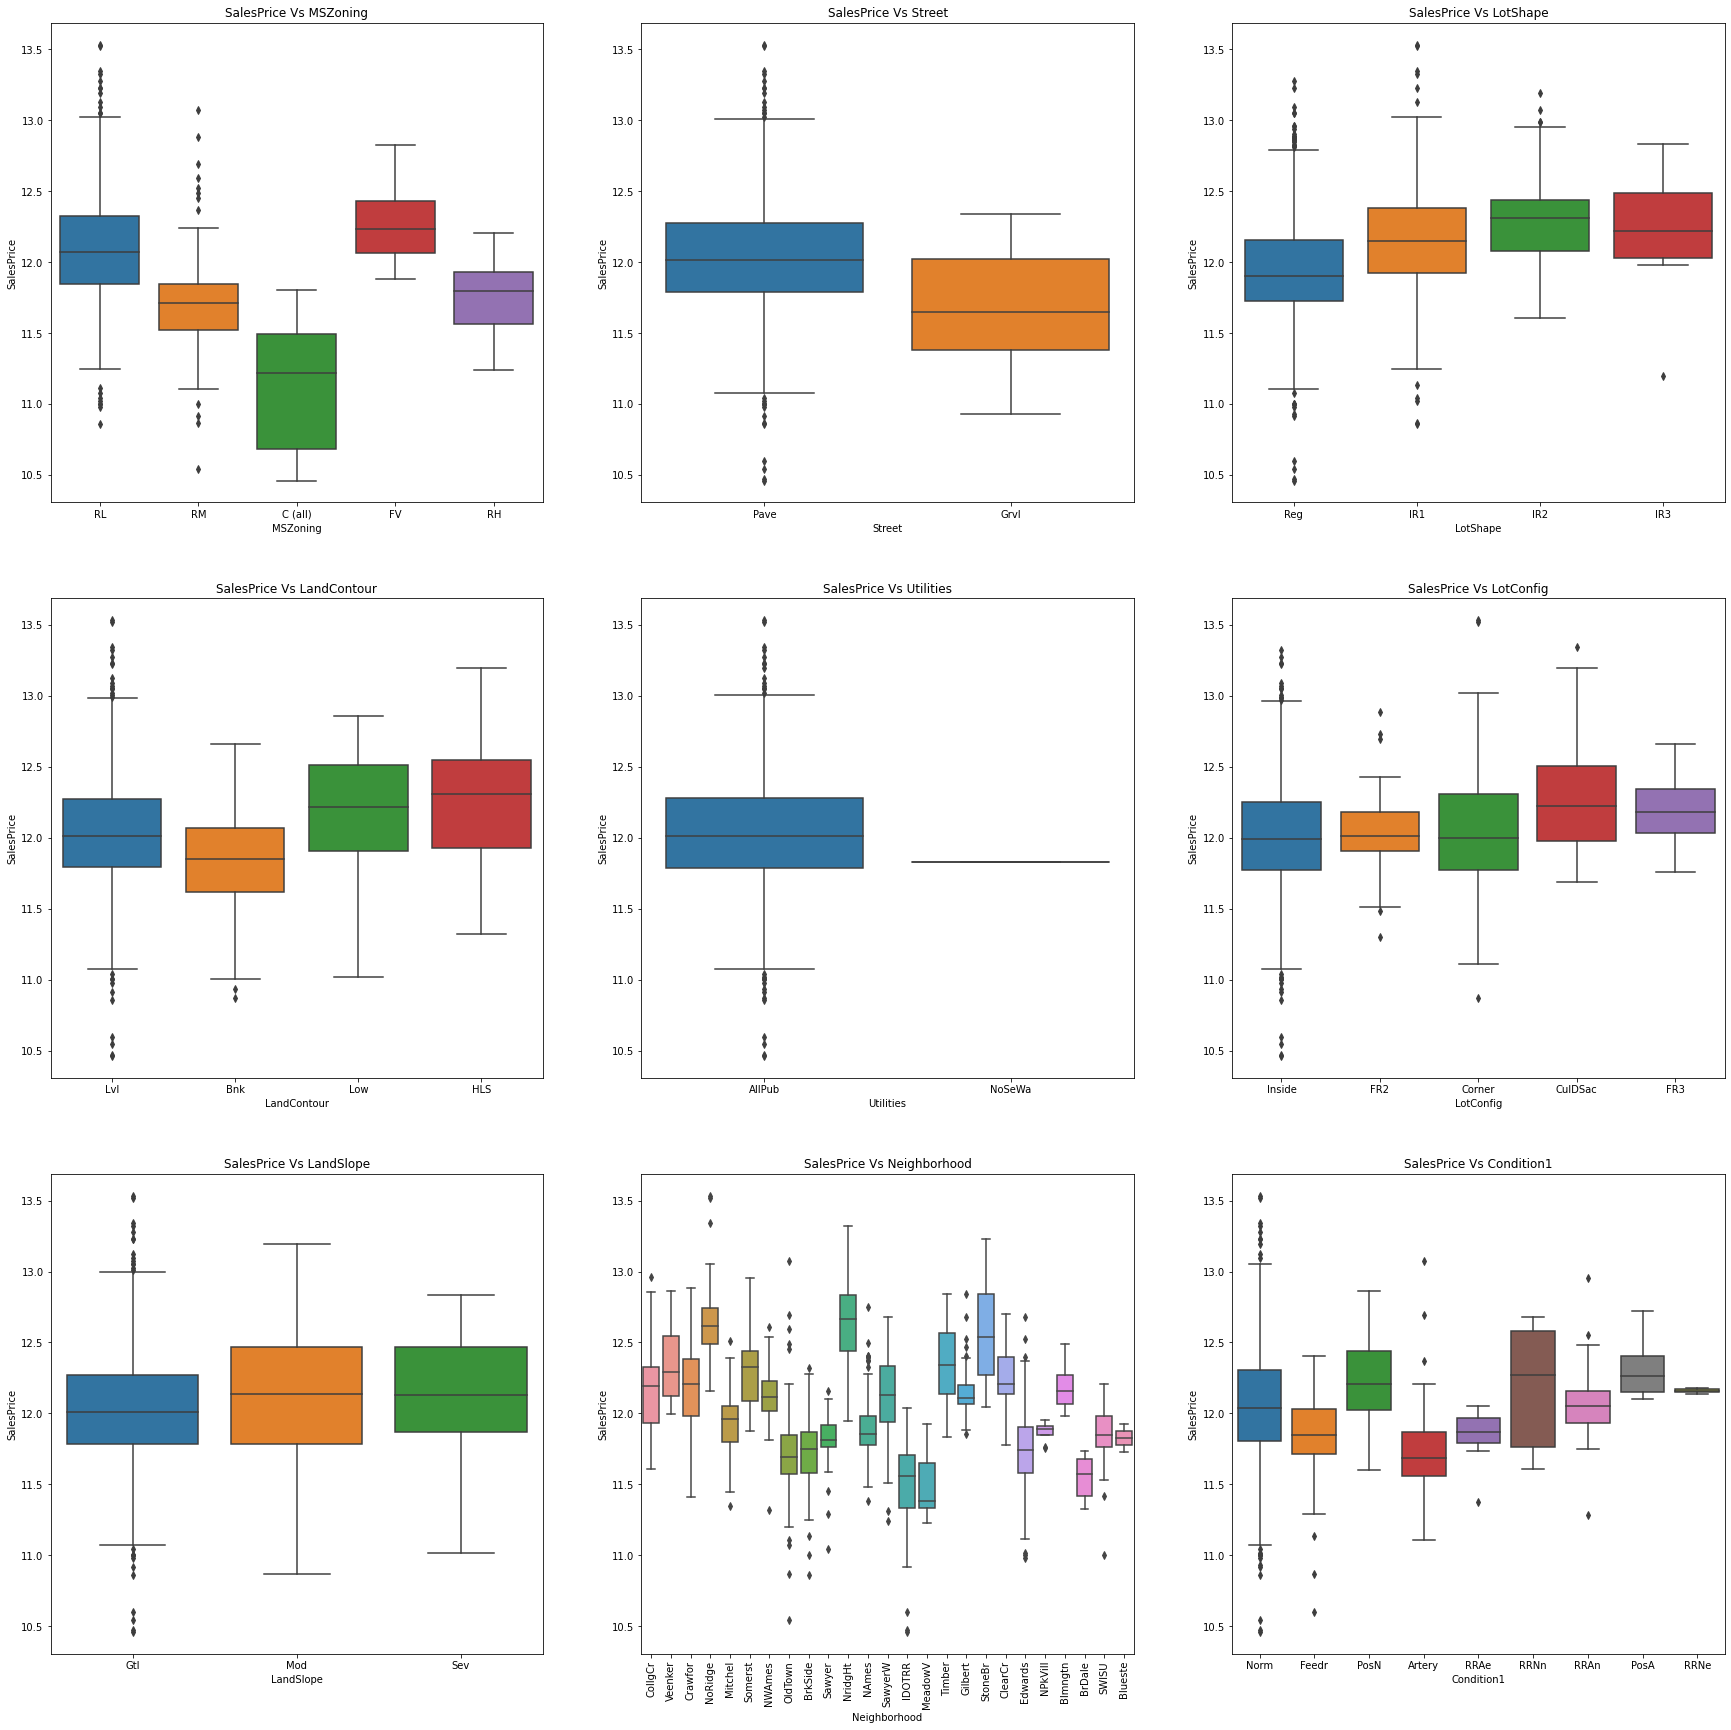

In [48]:
plt.figure(figsize=(30,30))

plt.subplot(3,3,1)
sns.boxplot(x="MSZoning",y="SalePrice",data=data)
plt.xlabel("MSZoning")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs MSZoning")

plt.subplot(3,3,2)
sns.boxplot(x="Street",y="SalePrice",data=data)
plt.xlabel("Street")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Street")


plt.subplot(3,3,3)
sns.boxplot(x="LotShape",y="SalePrice",data=data)
plt.xlabel("LotShape")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs LotShape")

plt.subplot(3,3,4)
sns.boxplot(x="LandContour",y="SalePrice",data=data)
plt.xlabel("LandContour")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs LandContour")
 
plt.subplot(3,3,5)
sns.boxplot(x="Utilities",y="SalePrice",data=data)
plt.xlabel("Utilities")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Utilities")

plt.subplot(3,3,6)
sns.boxplot(x="LotConfig",y="SalePrice",data=data)
plt.xlabel("LotConfig")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs LotConfig")

plt.subplot(3,3,7)
sns.boxplot(x="LandSlope",y="SalePrice",data=data)
plt.xlabel("LandSlope")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs LandSlope")


plt.subplot(3,3,8)
sns.boxplot(x="Neighborhood",y="SalePrice",data=data)
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Neighborhood")


plt.subplot(3,3,9)
sns.boxplot(x="Condition1",y="SalePrice",data=data)
plt.xlabel("Condition1")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Condition1")

plt.show()

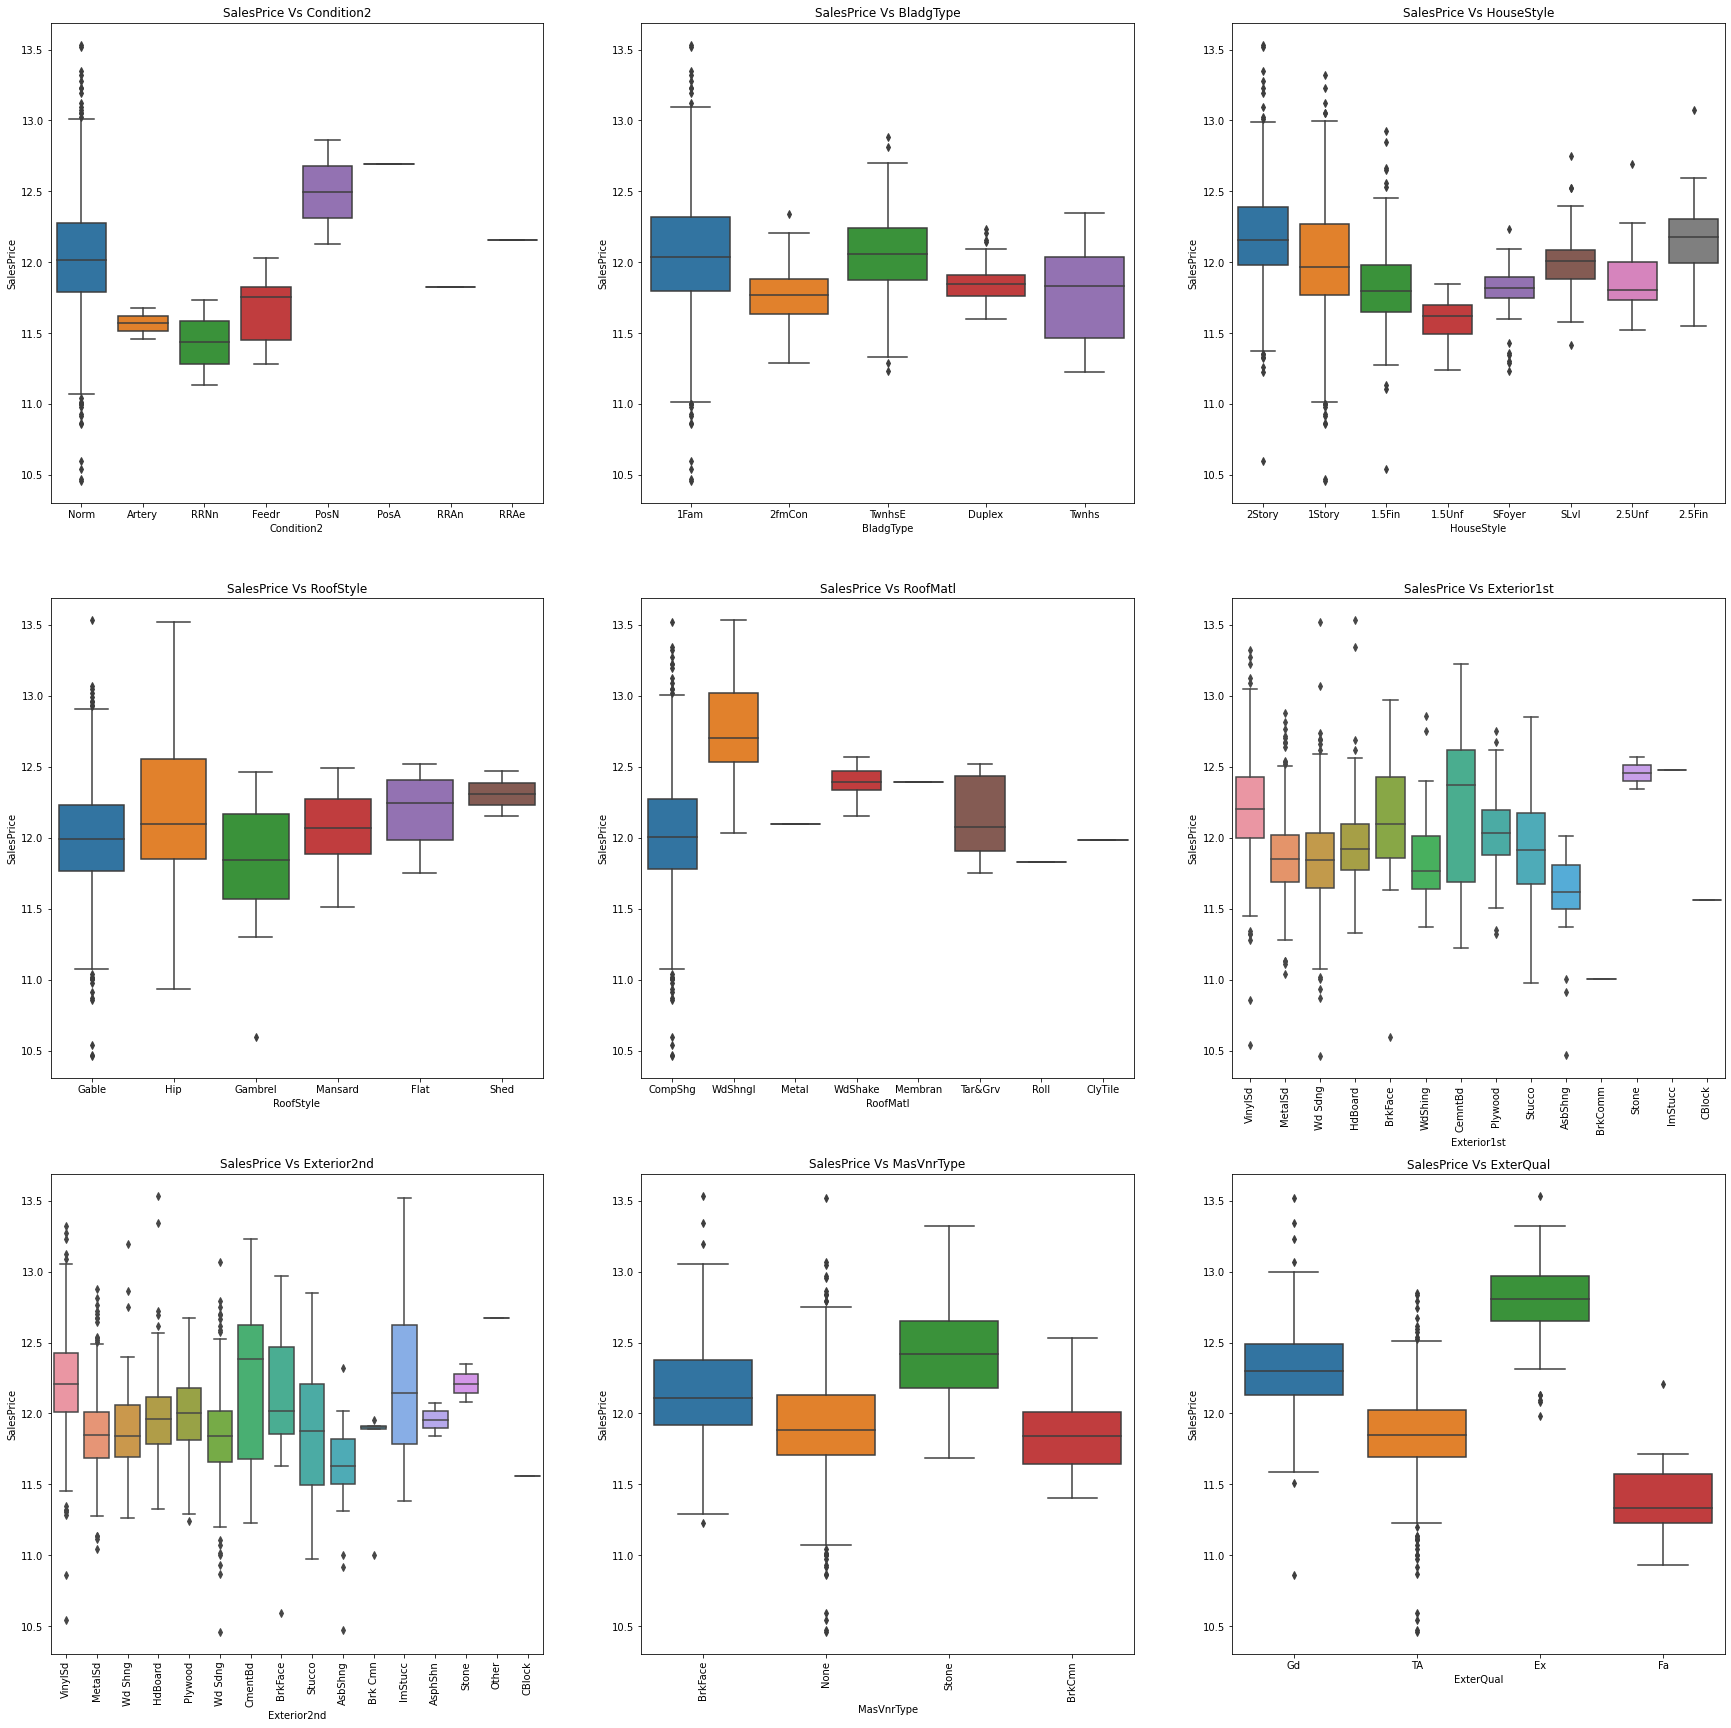

In [49]:
plt.figure(figsize=(30,30))

plt.subplot(3,3,1)
sns.boxplot(x="Condition2",y="SalePrice",data=data)
plt.xlabel("Condition2")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Condition2")

plt.subplot(3,3,2)
sns.boxplot(x="BldgType",y="SalePrice",data=data)
plt.xlabel("BladgType")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs BladgType")

plt.subplot(3,3,3)
sns.boxplot(x="HouseStyle",y="SalePrice",data=data)
plt.xlabel("HouseStyle")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs HouseStyle")

plt.subplot(3,3,4)
sns.boxplot(x="RoofStyle",y="SalePrice",data=data)
plt.xlabel("RoofStyle")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs RoofStyle")
 
plt.subplot(3,3,5)
sns.boxplot(x="RoofMatl",y="SalePrice",data=data)
plt.xlabel("RoofMatl")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs RoofMatl")

plt.subplot(3,3,6)
sns.boxplot(x="Exterior1st",y="SalePrice",data=data)
plt.xlabel("Exterior1st")
plt.ylabel("SalesPrice")
plt.xticks(rotation= 90)
plt.title("SalesPrice Vs Exterior1st")

plt.subplot(3,3,7)
sns.boxplot(x="Exterior2nd",y="SalePrice",data=data)
plt.xlabel("Exterior2nd")
plt.xticks(rotation= 90)
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Exterior2nd")


plt.subplot(3,3,8)
sns.boxplot(x="MasVnrType",y="SalePrice",data=data)
plt.xlabel("MasVnrType")
plt.xticks(rotation=90)
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs MasVnrType")


plt.subplot(3,3,9)
sns.boxplot(x="ExterQual",y="SalePrice",data=data)
plt.xlabel("ExterQual")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs ExterQual")


plt.show()

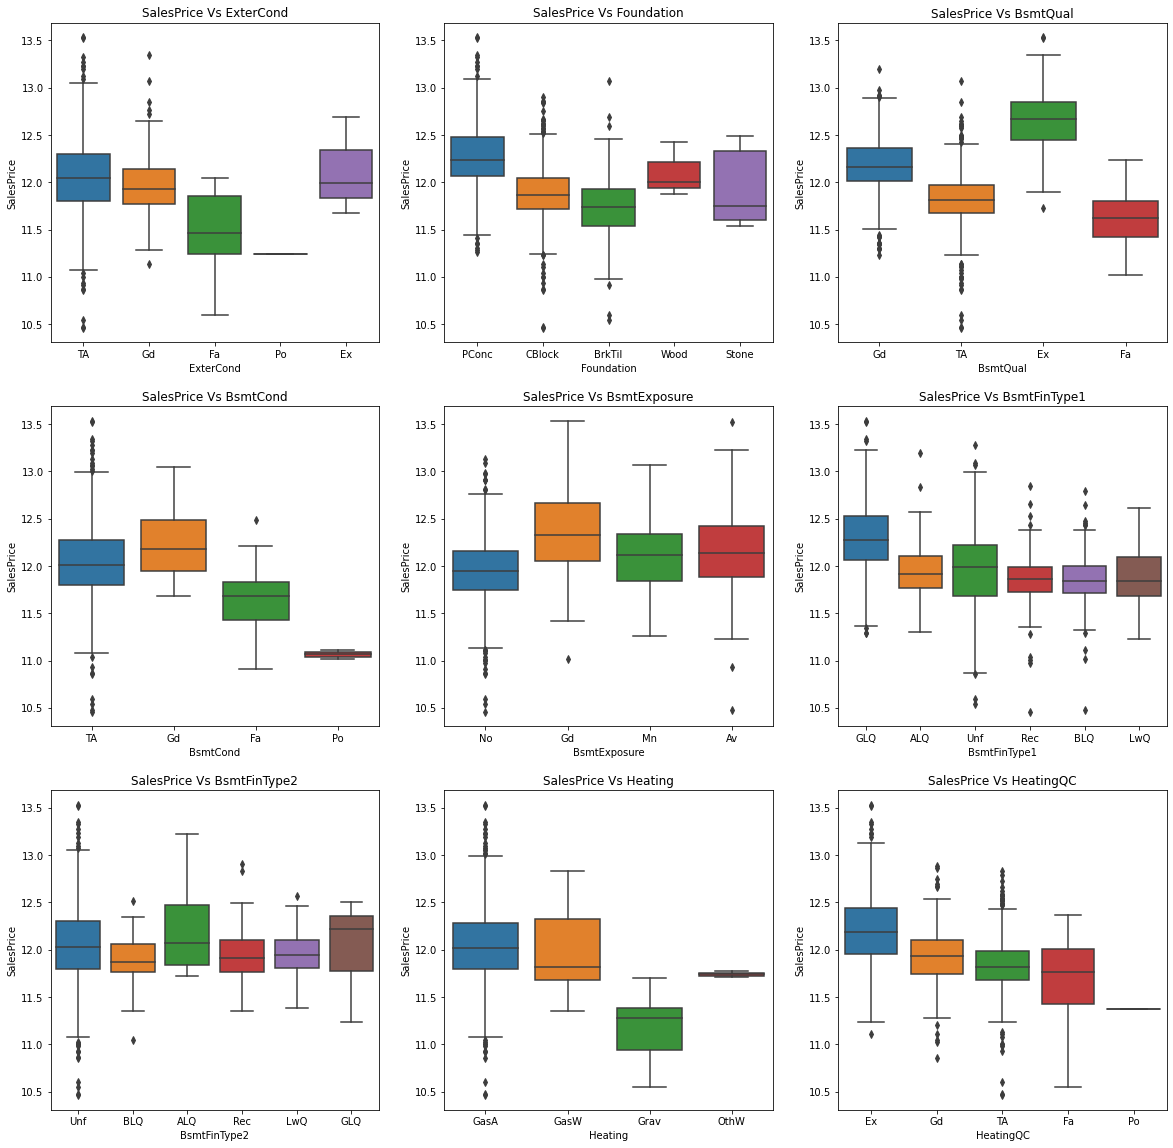

In [50]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x="ExterCond",y="SalePrice",data=data)
plt.xlabel("ExterCond")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs ExterCond")

plt.subplot(3,3,2)
sns.boxplot(x="Foundation",y="SalePrice",data=data)
plt.xlabel("Foundation")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Foundation")
 
plt.subplot(3,3,3)
sns.boxplot(x="BsmtQual",y="SalePrice",data=data)
plt.xlabel("BsmtQual")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs BsmtQual")

plt.subplot(3,3,4)
sns.boxplot(x="BsmtCond",y="SalePrice",data=data)
plt.xlabel("BsmtCond")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs BsmtCond")

plt.subplot(3,3,5)
sns.boxplot(x="BsmtExposure",y="SalePrice",data=data)
plt.xlabel("BsmtExposure")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs BsmtExposure")


plt.subplot(3,3,6)
sns.boxplot(x="BsmtFinType1",y="SalePrice",data=data)
plt.xlabel("BsmtFinType1")

plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs BsmtFinType1")


plt.subplot(3,3,7)
sns.boxplot(x="BsmtFinType2",y="SalePrice",data=data)
plt.xlabel("BsmtFinType2")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs BsmtFinType2")

plt.subplot(3,3,8)
sns.boxplot(x="Heating",y="SalePrice",data=data)
plt.xlabel("Heating")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Heating")

plt.subplot(3,3,9)
sns.boxplot(x="HeatingQC",y="SalePrice",data=data)
plt.xlabel("HeatingQC")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs HeatingQC")

plt.show()

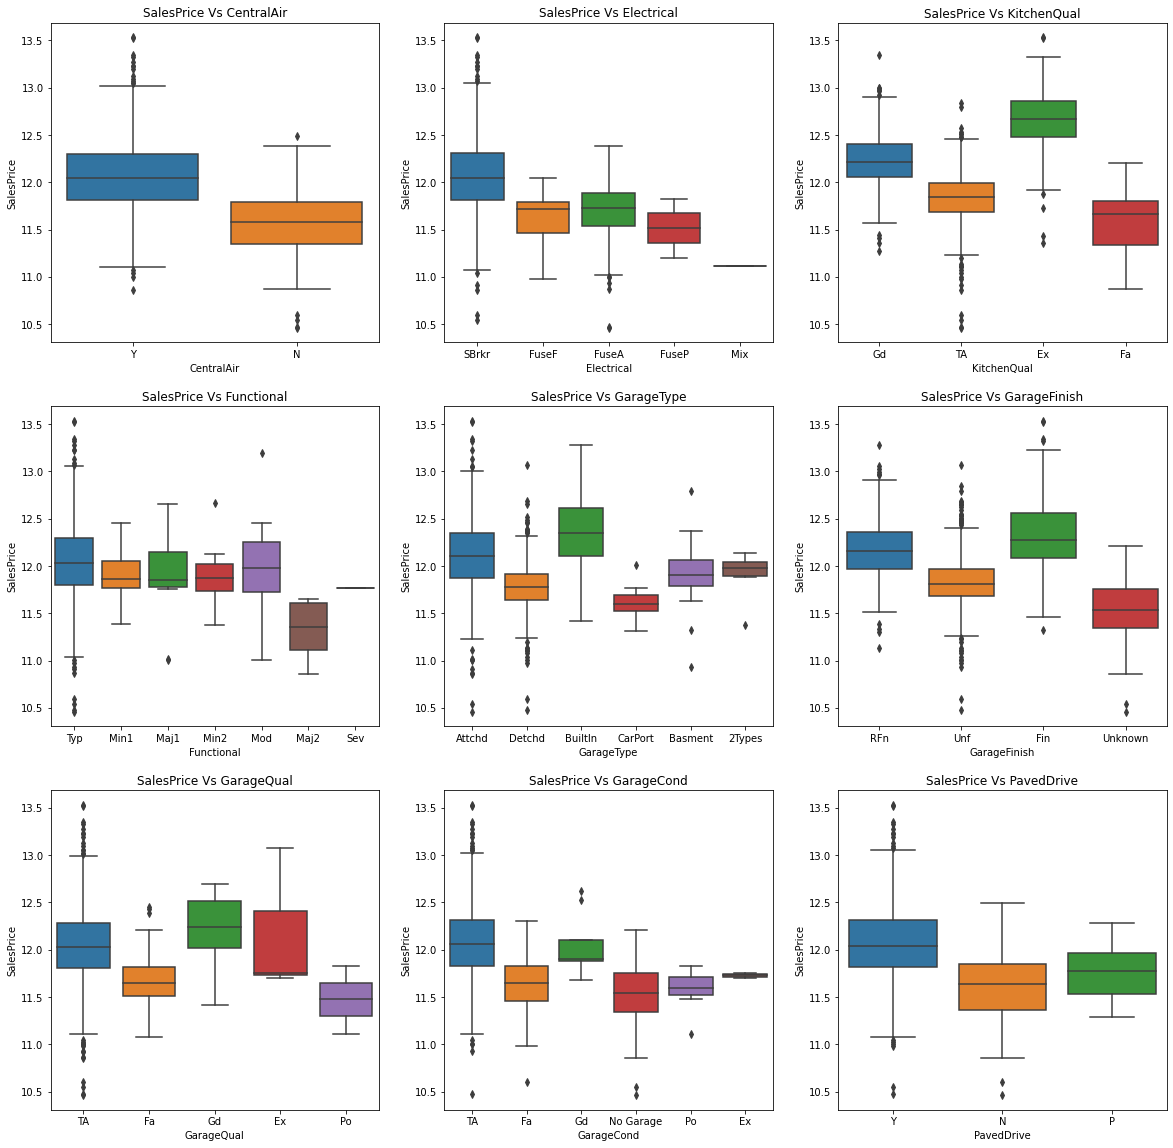

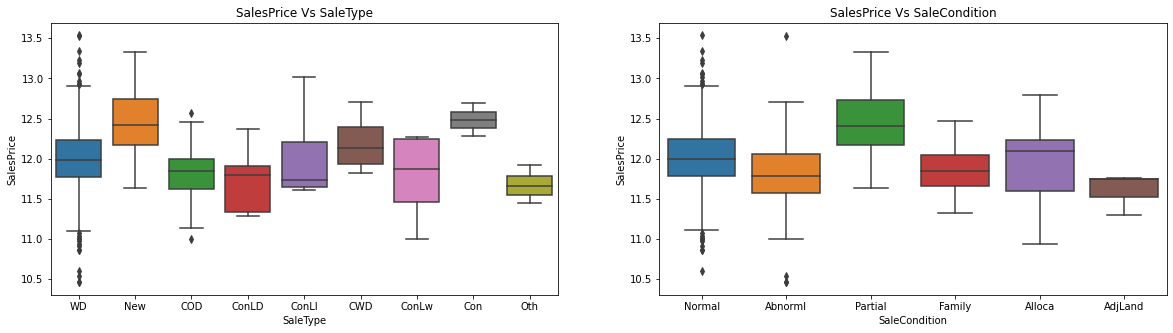

In [51]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x="CentralAir",y="SalePrice",data=data)
plt.xlabel("CentralAir")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs CentralAir")

plt.subplot(3,3,2)
sns.boxplot(x="Electrical",y="SalePrice",data=data)
plt.xlabel("Electrical")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Electrical")
 
plt.subplot(3,3,3)
sns.boxplot(x="KitchenQual",y="SalePrice",data=data)
plt.xlabel("KitchenQual")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs KitchenQual")

plt.subplot(3,3,4)
sns.boxplot(x="Functional",y="SalePrice",data=data)
plt.xlabel("Functional")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs Functional")

plt.subplot(3,3,5)
sns.boxplot(x="GarageType",y="SalePrice",data=data)
plt.xlabel("GarageType")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs GarageType")


plt.subplot(3,3,6)
sns.boxplot(x="GarageFinish",y="SalePrice",data=data)
plt.xlabel("GarageFinish")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs GarageFinish")


plt.subplot(3,3,7)
sns.boxplot(x="GarageQual",y="SalePrice",data=data)
plt.xlabel("GarageQual")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs GarageQual")

plt.subplot(3,3,8)
sns.boxplot(x="GarageCond",y="SalePrice",data=data)
plt.xlabel("GarageCond")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs GarageCond")

plt.subplot(3,3,9)
sns.boxplot(x="PavedDrive",y="SalePrice",data=data)
plt.xlabel("PavedDrive")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs PavedDrive")
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x="SaleType",y="SalePrice",data=data)
plt.xlabel("SaleType")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs SaleType")


plt.subplot(1,2,2)
sns.boxplot(x="SaleCondition",y="SalePrice",data=data)
plt.xlabel("SaleCondition")
plt.ylabel("SalesPrice")
plt.title("SalesPrice Vs SaleCondition")
plt.show()


## Inferences- :
- MSZoning have high in Floating Village Residential(FV) as price increase it also increases
- In Street Pave has more Sale Price when compared to Grvl
- In Utilities column their is high AllPub value than NoSeWa
- In ExterQual column the Sales Price is high in EX category
- The House with Basement Quality of type Excellent is high Sales price
- The House with Kitchen  Quality of type Excellent is high Sales price
- The Garage Type the of type Builtln is high in Sales price
- The Sales Condition of type partial is high in Sales price
- The Sales Type of 'New' catigory have high in Sales price

### So to analyse  the EDA part , It is better to drop some of columns which is highly skewed and also which is not effect to the data much. 

##### So we remove the columns which have high Skewness

In [52]:
data.drop(["PavedDrive","Functional","BsmtFinType2","BsmtCond","Electrical","LandSlope","LandContour","Condition2","Street","Utilities","Condition1","RoofMatl","CentralAir","Heating","ExterCond","GarageCond","SaleType","GarageQual"],axis=1,inplace=True)

# Dummy Variable
-  Change all the numeric variable into catigories to make dummy varibles.

In [53]:
data["MSSubClass"] = data["MSSubClass"].replace({20 :"1-STORY 1946 & NEWER ALL STYLES",
        30 :"1-STORY 1945 & OLDER",
        40 :"1-STORY W/FINISHED ATTIC ALL AGES",
        45 :"1-1/2 STORY - UNFINISHED ALL AGES",
        50 :"1-1/2 STORY FINISHED ALL AGES",
        60 :"2-STORY 1946 & NEWER",
        70 :"2-STORY 1945 & OLDER",
        75 :"2-1/2 STORY ALL AGES",
        80 :"SPLIT OR MULTI-LEVEL",
        85 :"SPLIT FOYER",
        90 :"DUPLEX - ALL STYLES AND AGES",
       120 :"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       150 :"1-1/2 STORY PUD - ALL AGES",
       160 :"2-STORY PUD - 1946 & NEWER",
       180 :"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       190 :"2 FAMILY CONVERSION - ALL STYLES AND AGES"})

data["OverallQual"] = data["OverallQual"].replace({
       10: "Very Excellent",
       9 :"Excellent",
       8 :"Very Good",
       7 :"Good",
       6 :"Above Average",
       5 :"Average",
       4 :"Below Average",
       3 :"Fair",
       2 :"Poor",
       1 :"Very Poor"})

data["OverallCond"] = data["OverallCond"].replace({
       10: "Very Excellent",
       9 :"Excellent",
       8 :"Very Good",
       7 :"Good",
       6 :"Above Average",
       5 :"Average",
       4 :"Below Average",
       3 :"Fair",
       2 :"Poor",
       1 :"Very Poor"})


In [54]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,time_of_sold
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,Normal,12.247694,5
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,Normal,12.109011,31
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,Normal,12.317167,6
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,Abnorml,11.849398,36
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,Normal,12.429216,8


In [55]:
data.shape

(1421, 54)

In [56]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,time_of_sold
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,Normal,12.247694,5
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,Normal,12.109011,31
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,Normal,12.317167,6
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,Abnorml,11.849398,36
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,Normal,12.429216,8


In [57]:
data.info() # So final Data which which is effect to the solution

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1421 non-null   object 
 1   MSZoning       1421 non-null   object 
 2   LotFrontage    1421 non-null   float64
 3   LotArea        1421 non-null   int64  
 4   LotShape       1421 non-null   object 
 5   LotConfig      1421 non-null   object 
 6   Neighborhood   1421 non-null   object 
 7   BldgType       1421 non-null   object 
 8   HouseStyle     1421 non-null   object 
 9   OverallQual    1421 non-null   object 
 10  OverallCond    1421 non-null   object 
 11  RoofStyle      1421 non-null   object 
 12  Exterior1st    1421 non-null   object 
 13  Exterior2nd    1421 non-null   object 
 14  MasVnrType     1421 non-null   object 
 15  MasVnrArea     1421 non-null   float64
 16  ExterQual      1421 non-null   object 
 17  Foundation     1421 non-null   object 
 18  BsmtQual

<AxesSubplot:>

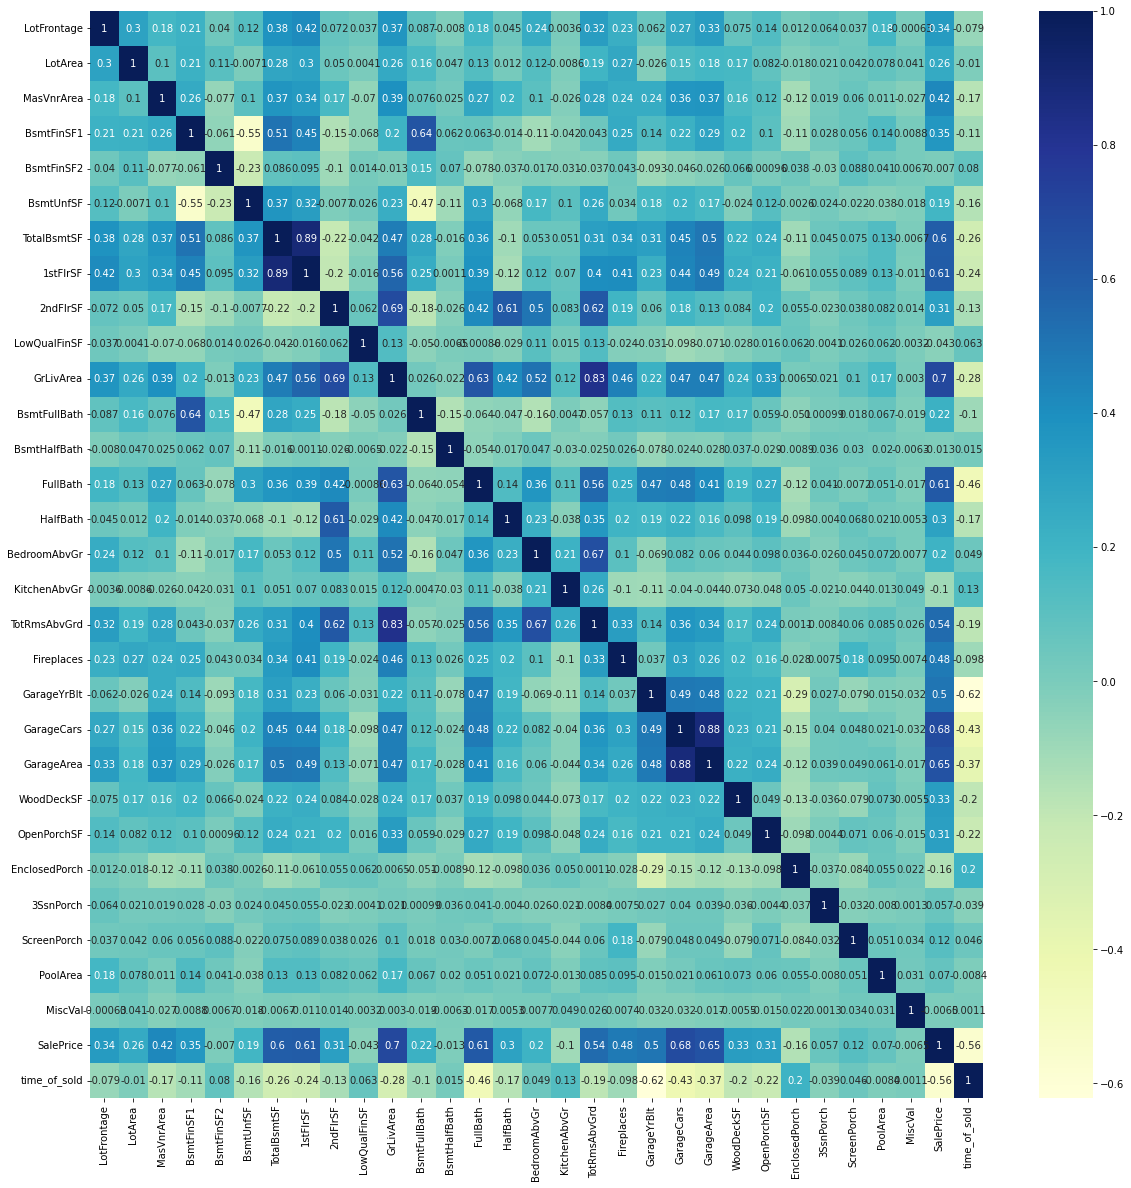

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap = "YlGnBu",annot=True)

In [59]:
Cat1 = data.select_dtypes(include=['object']) #all object datatype variables
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [60]:
Num = data.select_dtypes(include=['int64','float64']) #all numerical variables
Num.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'time_of_sold'],
      dtype='object')

In [61]:
Num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1421 non-null   float64
 1   LotArea        1421 non-null   int64  
 2   MasVnrArea     1421 non-null   float64
 3   BsmtFinSF1     1421 non-null   int64  
 4   BsmtFinSF2     1421 non-null   int64  
 5   BsmtUnfSF      1421 non-null   int64  
 6   TotalBsmtSF    1421 non-null   int64  
 7   1stFlrSF       1421 non-null   int64  
 8   2ndFlrSF       1421 non-null   int64  
 9   LowQualFinSF   1421 non-null   int64  
 10  GrLivArea      1421 non-null   int64  
 11  BsmtFullBath   1421 non-null   int64  
 12  BsmtHalfBath   1421 non-null   int64  
 13  FullBath       1421 non-null   int64  
 14  HalfBath       1421 non-null   int64  
 15  BedroomAbvGr   1421 non-null   int64  
 16  KitchenAbvGr   1421 non-null   int64  
 17  TotRmsAbvGrd   1421 non-null   int64  
 18  Fireplac

In [62]:
data.shape

(1421, 54)

In [63]:
Cat1 =pd.get_dummies(Cat1,drop_first=True)
print(Cat1.shape)

(1421, 151)


In [64]:
Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [65]:
# concat dummy variables with main dataset
data = pd.concat([data, Cat1], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,time_of_sold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,Normal,12.247694,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1459
Columns: 205 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(27), object(23), uint8(151)
memory usage: 820.1+ KB


In [67]:
data.drop(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],axis=1,inplace=True)

In [68]:
data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,time_of_sold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,12.247694,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,12.109011,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
X = data.drop(["SalePrice"],axis =1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,time_of_sold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0

#### As the Sales data  have not in normal form . Before we split into y variable i.e Sale price we can handle the non -linearity of the target variable which is now not in normal form. So to transform in the normal form we can use the DATA TRANSFORMATION

In [70]:
y = data["SalePrice"]
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

#### SPLITTING THE DATA
- Now X have feature or the predictor variable and y have target variable or a response variable
- Now we can to do another process which is splitting the data into train and test set


In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,test_size=0.7,random_state=100)

In [72]:
print("_________X variable _____________")
print("\t",X_train.shape)
print("\t",X_test.shape)

print("_________Y variable _____________")
print("\t",y_train.shape)
print("\t",y_test.shape)

_________X variable _____________
	 (426, 181)
	 (995, 181)
_________Y variable _____________
	 (426,)
	 (995,)


#### Make all the numeric variable in the Standard form which is in the range of 0-1

In [73]:
scaler = MinMaxScaler()

num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'time_of_sold']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,time_of_sold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
186,0.164384,0.053686,0.000000,0.108257,0.0,0.267998,0.158057,0.174976,0.000000,0.0,0.142774,0.5,0.0,0.666667,0.0,0.500000,0.0,0.333333,0.000000,0.808081,0.666667,0.350494,0.291667,0.064593,0.0,0.0,0.0,0.0,0.000000,0.300000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1073,0.184932,0.041007,0.119658,0.094791,0.0,0.071993,0.072870,0.051757,0.388889,0.0,

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Data Modeling - RFE Technique
- RFE Recursive feature elimination

In [75]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [76]:
y_pred =model.predict(X_train)

In [77]:
r2_score(y_train,y_pred)

0.919364920536642

In [78]:
rss = np.sum(np.square(y_train-y_pred))
mse = metrics.mean_squared_error(y_train,y_pred)
rmse = mse**0.5
print("RSS : ",rss)
print("MSE : ",mse)
print("RMSE : ",rmse)

RSS :  12.666452627163139
MSE :  0.012742910087689274
RMSE :  0.11288449888133124


In [79]:
residual = y_train - y_pred

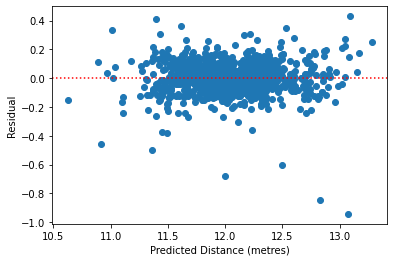

In [80]:
plt.scatter( y_pred , residual)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted Distance (metres)")
plt.ylabel("Residual")
plt.show()

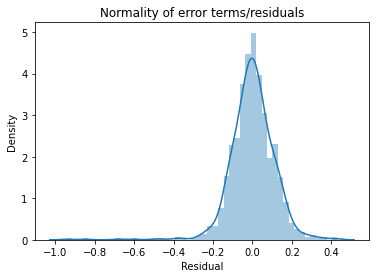

In [81]:
# Distribution of errors
p = sns.distplot(residual,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residual")
plt.show()

In [82]:
print("Cofficent : \n",model.coef_)
print("Intercept : \n",model.intercept_)

Cofficent : 
 [-5.68318561e-04  1.35549049e-06 -2.77600879e-06 -8.28485448e-06
  1.23595809e-05  5.24615667e-06  9.32094151e-06  3.62826260e-05
  6.90389996e-05 -1.99091878e-06  1.03330717e-04  3.68235018e-02
  2.44301426e-02  4.63729962e-02  4.94063830e-02 -3.54508142e-03
 -2.89089038e-02  1.79745767e-02  4.33429853e-02  6.29986960e-04
  6.41290493e-02 -2.36277203e-05  8.69233634e-05 -4.01491194e-05
  1.17625892e-04  2.83766984e-04  3.31847962e-04 -3.34648230e-04
  1.25004058e-06 -6.70480265e-04  1.12979737e-01 -9.67075656e-02
  3.70648806e-02 -3.65894259e-02  1.13503314e-01  1.40728719e-02
  1.70201332e-01  7.32040712e-02  9.27881247e-02  8.26464035e-03
  3.23499007e-02 -2.04618944e-02  2.12384535e-02  2.87875791e-02
  3.52506136e-01  3.03298526e-01  2.89658036e-01  2.66551003e-01
  4.31051261e-02 -9.84540760e-02  1.18854195e-02  3.10290220e-02
 -5.82983860e-02 -1.22320735e-01 -1.81261690e-02 -8.23855500e-02
 -3.87652712e-02  3.47345280e-02  5.19314652e-02  6.23951914e-03
  1.1901290

# RFE

In [83]:

lm = LinearRegression()
rfe  = RFE(lm,step = 90)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), step=90)

In [84]:
list(zip(X_train.columns,rfe.ranking_,rfe.support_))

[('LotFrontage', 3, False),
 ('LotArea', 3, False),
 ('MasVnrArea', 3, False),
 ('BsmtFinSF1', 3, False),
 ('BsmtFinSF2', 3, False),
 ('BsmtUnfSF', 3, False),
 ('TotalBsmtSF', 3, False),
 ('1stFlrSF', 3, False),
 ('2ndFlrSF', 3, False),
 ('LowQualFinSF', 3, False),
 ('GrLivArea', 3, False),
 ('BsmtFullBath', 3, False),
 ('BsmtHalfBath', 3, False),
 ('FullBath', 3, False),
 ('HalfBath', 1, True),
 ('BedroomAbvGr', 3, False),
 ('KitchenAbvGr', 3, False),
 ('TotRmsAbvGrd', 3, False),
 ('Fireplaces', 3, False),
 ('GarageYrBlt', 3, False),
 ('GarageCars', 1, True),
 ('GarageArea', 3, False),
 ('WoodDeckSF', 3, False),
 ('OpenPorchSF', 3, False),
 ('EnclosedPorch', 3, False),
 ('3SsnPorch', 3, False),
 ('ScreenPorch', 3, False),
 ('PoolArea', 3, False),
 ('MiscVal', 3, False),
 ('time_of_sold', 3, False),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 1, True),
 ('MSSubClass_1-STORY 1945 & OLDER', 1, True),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 3, False),
 ('MSSubClass_1-STORY PUD (

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['HalfBath', 'GarageCars', 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2-1/2 STORY ALL AGES', 'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY 1946 & NEWER', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR2',
       'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'OverallQual_Below Average',
       'OverallQual_Excellent', 'OverallQual_Fair', 'OverallQual_Good',
      

In [86]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'time_of_sold',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT FOYER', 'MSSubClass_SPLIT OR MULTI-LEVEL',
       'LotShape_IR2', 'LotShape_Reg', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighbor

In [87]:
X_train_sm = sm.add_constant(X_train[col])



In [88]:
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     67.08
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:56:40   Log-Likelihood:                 509.43
No. Observations:                 994   AIC:                            -840.9
Df Residuals:                     905   BIC:                            -404.6
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

# VIF

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif)

                                        Features     VIF
0                                       HalfBath    3.56
1                                     GarageCars   19.43
2       MSSubClass_1-1/2 STORY FINISHED ALL AGES    3.20
3                MSSubClass_1-STORY 1945 & OLDER    1.86
4   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES    1.06
5                MSSubClass_2-1/2 STORY ALL AGES    8.14
6                MSSubClass_2-STORY 1945 & OLDER    2.21
7                MSSubClass_2-STORY 1946 & NEWER    7.03
8                                    MSZoning_FV    8.52
9                                    MSZoning_RH    2.37
10                                   MSZoning_RL  124.11
11                                   MSZoning_RM   21.01
12                                  LotShape_IR3    1.08
13                                 LotConfig_FR2    1.17
14                                 LotConfig_FR3    1.11
15                          Neighborhood_Blueste    1.11
16                          Nei

#### The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 91.9% and the columns has VIF value of infinite which shows multicollinerity

## Data Modeling - Advanced Regression
- Regularization is a process used to create an optimally complex model, i.e. a model which is as simple as possible while performing well on the training data. Through regularization, one tries to strike the delicate balance between keeping the model simple, yet not making it too naive to be of any use.

## <u> Ridge Regression</u>

In [90]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017188,0.001514,0.000000,0.000000,0.00004,{'alpha': 4e-05},0.843432,0.805288,0.886253,0.883268,0.728334,0.829315,0.058526,6,0.926196,0.933212,0.917821,0.918870,0.934416,0.926103,0.006936
1,0.017056,0.003742,0.004162,0.006217,0.0001,{'alpha': 0.0001},0.843447,0.805293,0.886256,0.883271,0.728341,0.829322,0.058525,5,0.926196,0.933212,0.917821,0.918870,0.934416,0.926103,0.006936
2,0.017310,0.001243,0.010224,0.008352,0.001,{'alpha': 0.001},0.843678,0.805365,0.886296,0.883311,0.728439,0.829418,0.058512,4,0.926195,0.933212,0.917821,0.918870,0.934415,0.926103,0.006936
3,0.017085,0.001561,0.004914,0.005858,0.01,{'alpha': 0.01},0.845727,0.806030,0.886683,0.883695,0.729292,0.830285,0.058412,3,0.926180,0.933210,0.917820,0.918864,0.934407,0.926096,0.006935
4,0.012813,0.006342,0.014013,0.007107,0.1,{'alpha': 0.1},0.855778,0.809828,0.889195,0.887406,0.733331,0.835107,0.058456,2,0.925778,0.933088,0.917697,0.918728,0.934199,0.925898,0.006918


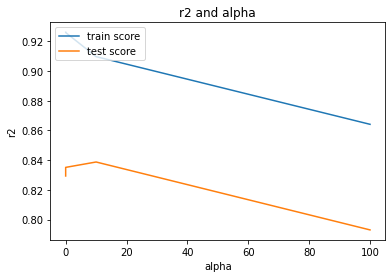

In [92]:
# plt.figure(figsize=(16,6))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

- We see that the optimal alpha value is between 0-20

In [94]:
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

In [95]:
best_ridge_alpha

10

In [96]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.76870695e-04,  9.26784793e-07,  2.66933098e-05,  2.20693779e-06,
        2.02451967e-05,  8.20852962e-06,  3.06606611e-05,  6.23718417e-05,
        7.81729430e-05, -3.87312367e-05,  1.01813541e-04,  3.09041859e-02,
        9.32340022e-03,  4.22568160e-02,  3.81767237e-02, -1.68561513e-05,
       -6.29328502e-02,  1.59840989e-02,  4.66774174e-02,  5.02488899e-04,
        6.86384303e-02, -1.61157951e-05,  9.64710550e-05, -3.86929708e-05,
        1.17007689e-04,  2.28064467e-04,  3.54827095e-04, -3.92601035e-04,
        9.59386885e-08, -1.15726539e-03,  1.04657625e-02, -8.69266233e-02,
        3.82947812e-02, -5.73690578e-03,  2.46236465e-02, -1.20582766e-02,
        1.39662288e-02,  1.54581615e-02,  2.29496622e-02, -4.83183937e-02,
        1.96721449e-02, -1.61648583e-02,  1.21925520e-03,  1.06571725e-02,
        8.39640746e-02,  2.92135478e-02,  6.81707430e-02,  1.31811846e-02,
        3.11368133e-02, -5.82874706e-02,  3.08518926e-03,  2.19646141e-02,
       -3.56076402e-02, -

In [97]:
ridge.score(X_train,y_train)

0.9064692679305856

In [98]:
ridge.score(X_test,y_test)

0.8696660333045401

- Ridge regression train r2:  0.90646
- Ridge regression test r2:  0.8696

In [99]:
# Ridge model parameters
model_parameters1 = list(sorted(ridge.coef_))
model_parameters1.insert(0, ridge.intercept_)
model_parameters1 = [round(x, 3) for x in model_parameters1]
cols1 = X.columns
cols1 = cols1.insert(0, "constant")
list((zip(cols1, model_parameters1)))

[('constant', 10.442),
 ('LotFrontage', -0.135),
 ('LotArea', -0.093),
 ('MasVnrArea', -0.093),
 ('BsmtFinSF1', -0.087),
 ('BsmtFinSF2', -0.085),
 ('BsmtUnfSF', -0.078),
 ('TotalBsmtSF', -0.075),
 ('1stFlrSF', -0.073),
 ('2ndFlrSF', -0.07),
 ('LowQualFinSF', -0.065),
 ('GrLivArea', -0.063),
 ('BsmtFullBath', -0.063),
 ('BsmtHalfBath', -0.062),
 ('FullBath', -0.058),
 ('HalfBath', -0.055),
 ('BedroomAbvGr', -0.05),
 ('KitchenAbvGr', -0.049),
 ('TotRmsAbvGrd', -0.048),
 ('Fireplaces', -0.046),
 ('GarageYrBlt', -0.045),
 ('GarageCars', -0.043),
 ('GarageArea', -0.042),
 ('WoodDeckSF', -0.041),
 ('OpenPorchSF', -0.039),
 ('EnclosedPorch', -0.037),
 ('3SsnPorch', -0.036),
 ('ScreenPorch', -0.03),
 ('PoolArea', -0.03),
 ('MiscVal', -0.029),
 ('time_of_sold', -0.029),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.028),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.028),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.028),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 

## <u> LASSO REGRESSION </u>


In [100]:
params1 = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008]}
from sklearn.linear_model import Ridge,Lasso
lasso = Lasso()

# cross validation
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params1, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [101]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.149942,0.033630,0.006755,0.008273,0.00006,{'alpha': 6e-05},0.863342,0.814308,0.893219,0.895904,0.731177,0.839590,0.061651,1,0.924431,0.932294,0.916866,0.917796,0.933515,0.924980,0.006987
1,0.060793,0.016756,0.004400,0.008800,0.0006,{'alpha': 0.0006},0.865862,0.820512,0.883243,0.906114,0.696919,0.834530,0.074313,2,0.908576,0.920068,0.903921,0.903330,0.919136,0.911006,0.007256
2,0.049878,0.033678,0.000000,0.000000,0.0008,{'alpha': 0.0008},0.859926,0.820787,0.881578,0.904039,0.685349,0.830336,0.077519,3,0.903205,0.914862,0.899247,0.899439,0.915762,0.906503,0.007335
3,0.046568,0.019334,0.000000,0.000000,0.001,{'alpha': 0.001},0.855044,0.818671,0.878233,0.901865,0.676099,0.825982,0.079814,4,0.898199,0.909505,0.894354,0.895155,0.912119,0.901866,0.007462
4,0.026717,0.007954,0.006601,0.008087,0.002,{'alpha': 0.002},0.849648,0.795352,0.856346,0.887784,0.638324,0.805491,0.088719,5,0.880503,0.885577,0.871808,0.873685,0.894824,0.881280,0.008366


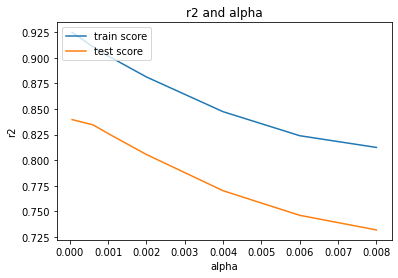

In [102]:
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [103]:
best_lasso_score = model_cv1.best_score_
best_lasso_alpha1 = model_cv1.best_params_["alpha"]
best_lasso_alpha1

6e-05

In [104]:
alpha = 0.00006
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-5.40904903e-04,  1.25587204e-06, -2.17996116e-06, -3.73777019e-06,
        1.47415488e-05,  1.00710323e-05,  7.59102089e-06,  1.22524627e-04,
        1.46772468e-04,  6.94974046e-05,  1.97701665e-05,  3.62205811e-02,
        2.04036662e-02,  4.56916174e-02,  4.70005123e-02, -3.24018201e-03,
       -4.78000498e-02,  1.71967922e-02,  4.39981059e-02,  6.49460346e-04,
        6.32777716e-02, -3.02602482e-05,  8.78687165e-05, -4.41826825e-05,
        1.12718430e-04,  2.59466867e-04,  3.26085968e-04, -3.33843598e-04,
        5.51342226e-07, -7.11977711e-04,  3.32242207e-02, -1.36286887e-01,
       -0.00000000e+00, -3.39728874e-02,  4.17317142e-02, -1.18559831e-02,
        2.96686268e-02,  0.00000000e+00,  2.67595426e-02, -2.19346935e-02,
        2.99714779e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.09525156e-01,  2.47920227e-01,  2.53845509e-01,  2.20904348e-01,
        4.03547557e-02, -9.44521410e-02,  1.05954930e-02,  2.80979579e-02,
       -5.22048395e-02, -

In [105]:
lasso.score(X_train,y_train)

0.918417495755109

In [106]:
lasso.score(X_test,y_test)

0.8708121632106051

- Lasso train score - 0.9184
- Lasso test score - 0.8708

In [107]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 9.887),
 ('LotFrontage', -0.367),
 ('LotArea', -0.329),
 ('MasVnrArea', -0.198),
 ('BsmtFinSF1', -0.166),
 ('BsmtFinSF2', -0.136),
 ('BsmtUnfSF', -0.131),
 ('TotalBsmtSF', -0.098),
 ('1stFlrSF', -0.096),
 ('2ndFlrSF', -0.094),
 ('LowQualFinSF', -0.091),
 ('GrLivArea', -0.085),
 ('BsmtFullBath', -0.081),
 ('BsmtHalfBath', -0.073),
 ('FullBath', -0.072),
 ('HalfBath', -0.065),
 ('BedroomAbvGr', -0.064),
 ('KitchenAbvGr', -0.061),
 ('TotRmsAbvGrd', -0.058),
 ('Fireplaces', -0.057),
 ('GarageYrBlt', -0.054),
 ('GarageCars', -0.054),
 ('GarageArea', -0.052),
 ('WoodDeckSF', -0.052),
 ('OpenPorchSF', -0.052),
 ('EnclosedPorch', -0.052),
 ('3SsnPorch', -0.05),
 ('ScreenPorch', -0.048),
 ('PoolArea', -0.048),
 ('MiscVal', -0.046),
 ('time_of_sold', -0.04),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.037),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.035),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.034),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',

In [108]:
a = ["Lasso Score Train","Lasso Score Test","Ridge Score Train","Ridge Score Test"]
b = [0.918417495755109,0.8708121632106051 , 0.9064692679305856, 0.8696660333045401]
final_dataFrame = pd.DataFrame({"Model Test and Train ":a,"R-2 Score":b})
final_dataFrame

,Model Test and Train,R-2 Score
0,Lasso Score Train,0.918417
1,Lasso Score Test,0.870812
2,Ridge Score Train,0.906469
3,Ridge Score Test,0.869666


# Conclusion
- The Ridge and Lasso regression r-2 score of train and test set .
- Ridge : Train :90.6% Test :86.9%
- Lasso : Train :91.8% Test :87.0%

## The most significant variables which help in increase in Sales in Ridge are -:
- ('SaleCondition_Partial', 0.135)
- ('SaleCondition_Normal', 0.094)
- ('GarageFinish_Family', 0.09)
- ('SaleCondition_Alloca', 0.087)
- (GarageFinish_Unknown', 0.084)
- ('SaleCondition_AdjLand', 0.084)

## The most significant variables which help in increase in Sales in Lasso are -:
- ('SaleCondition_Partial', 0.31)
- ('SaleCondition_Normal', 0.254)
- ('GarageFinish_Family', 0.248)
- ('SaleCondition_Alloca', 0.221)
- ('SaleCondition_AdjLand', 0.221)
- (GarageFinish_Unknown', 0.171)

#### So in the concept of regulariztion we need model that can find the genereal pattern in data and they should work well in unseen    data so we use penality in the regression model -: 
- I used the best score for aplha in Ridge Regression - : 10
- Moreover, the best score for the lasso Regression -: 0.00006

# So In this Model I used to prefer the Lasso Regression 